In [2]:
import data_frame
import models
import importlib
import evaluator as ev

importlib.reload(models)

In [3]:
filePath = "../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [12]:
# df.data.loc[df.data["faint"], "MAG_GAAP_r"].min()
df.data["MAG_GAAP_r"]

0          20.716307
1          21.481810
14         20.920393
23         22.640545
49         20.336668
             ...    
2649220    22.916708
2649223    21.824081
2649230    20.658283
2649258    23.034378
2649270    21.782635
Name: MAG_GAAP_r, Length: 157849, dtype: float32

In [4]:
model = models.MLModelContext(strategy=models.ANNDoubleGauss(df))
model.train()
model.test_predict()

2025-07-11 10:52:54.048015: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_INVALID_DEVICE: invalid device ordinal
2025-07-11 10:52:54.048049: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-07-11 10:52:54.048053: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: borsuk
2025-07-11 10:52:54.048055: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: borsuk
2025-07-11 10:52:54.048152: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 570.133.7
2025-07-11 10:52:54.048174: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported version is: 5

Epoch 162: early stopping
Restoring model weights from the end of the best epoch: 132.


2025-07-11 10:54:52.443276: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.
/home/kdrabicki/projekt/models.py:199: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.622947096824646' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.dataFrame.data.loc[indexes, "Z_pred"] = y_pred
/home/kdrabicki/projekt/models.py:200: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7356762886047363' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.dataFrame.data.loc[indexes, "Z_pred_std"] = y_std


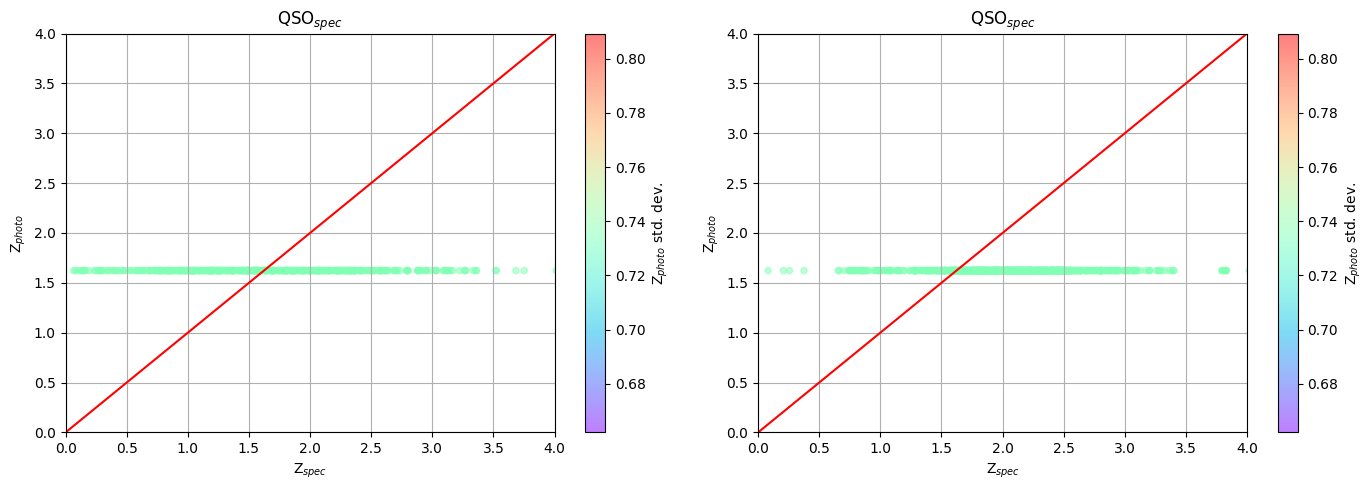

,MSE,R^2,Redshift error
test,0.563373,-0.005233,"(0.06599714824587888, 0.3326596922279008)"
faint,0.560312,-0.641394,"(-0.11981555678970152, 0.1844721671309697)"


In [6]:
importlib.reload(ev)
evaluator = ev.Evaluator(df)
evaluator.redshift_with_std_plot()
evaluator.evaluate_metrics()